# Configs

In [1]:
# -*- coding: utf-8 -*-
# encoding declaration in python
# decode("unicode-escape") -->
# importing unicode-literals must be the first thing to import
# from __future__ import unicode_literals

import pandas as pd
import nltk 
import unicodedata as ud
import string
from tkinter import *
from tashaphyne.stemming import ArabicLightStemmer
from tashaphyne import arabicstopwords
from sklearn.utils import shuffle

punc=list(string.punctuation)


# Read dataset

In [2]:
fakeDS = pd.read_csv('fake-news-mod.csv', names=['news','label'],header=None, skiprows=1,encoding='utf-8')[:5000]
realDS = pd.read_csv('real-news.csv', names=['news','label'],header=None, skiprows=1,encoding='utf-8')[:5000]


allDS = pd.concat([fakeDS,realDS])
allDS.tail()

,news,label
4995,السعادة شعور جميل يجدد نشاط الجسم ويجعله قادرا...,real
4996,تعرض نجم المنتخب البرازيلي نيمار دا سيلفا لإ...,real
4997,حرب كلامية شرسة بين وكيلي اعمال رونالدو و نيما...,real
4998,يشرع للعاطس أن يحمد الله تعالى فيقول الحم...,real
4999,ن م ر ود بن كنعان وعرف عند المسلمين بن م ر ود...,real


In [3]:
# allDS=shuffle(allDS)
# allDS.head()

In [4]:
allDS=allDS.reset_index(drop=True)
allDS.tail()

,news,label
9995,السعادة شعور جميل يجدد نشاط الجسم ويجعله قادرا...,real
9996,تعرض نجم المنتخب البرازيلي نيمار دا سيلفا لإ...,real
9997,حرب كلامية شرسة بين وكيلي اعمال رونالدو و نيما...,real
9998,يشرع للعاطس أن يحمد الله تعالى فيقول الحم...,real
9999,ن م ر ود بن كنعان وعرف عند المسلمين بن م ر ود...,real


# Preprossessing

In [5]:
allDS['label'] = allDS.label.map({'fake':0, 'real':1})
allDS.head()

,news,label
0,تحليل السيسي الرقم الصعب فى مؤتمر العشرين ال...,0
1,طالب توجيهي يكتشف حبه لمتابعة النشرة الاقتصادي...,0
2,عانس تجد عريسا رغم بلوغها سن الرابعة والعشرين...,0
3,التنمية لم نضبط متسولين بأول أيام رمضان باستث...,0
4,شاب ينزعج من خبر تفجير رغم وقوعه كالمعتاد في ب...,0


In [6]:
# def getAllAsParagraph():
#     return ''.join([str(e) for e in allDS.news])

In [7]:
# def segmentation(document):
#     sentences =document.split('.')
#     return " ".join(sentences)


In [8]:
def tokenize(txt):
    tokens = nltk.word_tokenize(txt)
    return tokens

allDS.news = allDS.news.map(lambda x:tokenize(x))   
len(allDS.news[0])
allDS.head()


,news,label
0,"[تحليل, السيسي, الرقم, الصعب, فى, مؤتمر, العشر...",0
1,"[طالب, توجيهي, يكتشف, حبه, لمتابعة, النشرة, ال...",0
2,"[عانس, تجد, عريسا, رغم, بلوغها, سن, الرابعة, و...",0
3,"[التنمية, لم, نضبط, متسولين, بأول, أيام, رمضان...",0
4,"[شاب, ينزعج, من, خبر, تفجير, رغم, وقوعه, كالمع...",0


In [9]:
def removeStopWords(tokensList):
    stopWordList = open("stopwords.txt", encoding="utf-8").read().splitlines()
    SWCleanText = []
    for token in tokensList:
        if token not in stopWordList:
            SWCleanText.append(token)
    return SWCleanText

allDS.news = allDS.news.map(lambda x:removeStopWords(x))

# len(allDS.news[0])
allDS.head()

,news,label
0,"[تحليل, السيسي, الرقم, الصعب, مؤتمر, العشرين, ...",0
1,"[طالب, توجيهي, يكتشف, حبه, لمتابعة, النشرة, ال...",0
2,"[عانس, تجد, عريسا, رغم, بلوغها, سن, الرابعة, و...",0
3,"[التنمية, نضبط, متسولين, بأول, أيام, رمضان, با...",0
4,"[شاب, ينزعج, خبر, تفجير, رغم, وقوعه, كالمعتاد,...",0


In [10]:
def punctuationsRemoving(txt):
    result=[]
    for word in txt: 
        if word not in punc:
            result.append(word)     
    return result
    
allDS.news = allDS.news.map(lambda x:punctuationsRemoving(x))

# len(allDS.news[0])
allDS.head()

,news,label
0,"[تحليل, السيسي, الرقم, الصعب, مؤتمر, العشرين, ...",0
1,"[طالب, توجيهي, يكتشف, حبه, لمتابعة, النشرة, ال...",0
2,"[عانس, تجد, عريسا, رغم, بلوغها, سن, الرابعة, و...",0
3,"[التنمية, نضبط, متسولين, بأول, أيام, رمضان, با...",0
4,"[شاب, ينزعج, خبر, تفجير, رغم, وقوعه, كالمعتاد,...",0


In [11]:
def ISRI_Stemmer(listOfWords):
    st = nltk.ISRIStemmer()
    stemedList = []
    for word in listOfWords:
        stemedList.append(st.stem(word))
    return stemedList
    
allDS.news = allDS.news.map(lambda x:ISRI_Stemmer(x))
allDS.head()

,news,label
0,"[حلل, سيس, رقم, صعب, ؤمر, عشر, ياب, ؤمر, عشر, ...",0
1,"[طلب, وجه, كشف, حبه, تبع, نشر, قصد, ة, كشف, طل...",0
2,"[عنس, تجد, عرس, رغم, بلغ, سن, ربع, عشر, نجح, ف...",0
3,"[نمي, ضبط, تسل, بأل, ايم, رمض, باستثناء, علم, ...",0
4,"[شاب, زعج, خبر, فجر, رغم, وقع, عتد, غدد, شعر, ...",0


## Convert all news To String

In [12]:
def getAllAsParagraph(listOfLists):
    lines = []
    for wordList in listOfLists:
        lines.append(' '.join(wordList))
    return lines


allText = getAllAsParagraph(allDS.news)
# print(allText)

# Feature extraction

In [13]:
#
# Feature ex:
#     1- Binary encoding
#     2- Count Vectorizer
#     3- TF-IDF
    
# Classificaion:
#     1- Naive base
#     2- RandomForest

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [15]:
tfidf_vec=TfidfVectorizer()
tfidf_vec.fit(allText)

tfidf_vec=TfidfVectorizer()
tfidf_vec.fit(allText)
labels = [x for x in (tfidf_vec.vocabulary_.keys())]
tfidf_trans = tfidf_vec.transform(allText).toarray()

pd.DataFrame(tfidf_trans, columns = labels)

,حلل,سيس,رقم,صعب,ؤمر,عشر,ياب,فرد,وكل,باء,...,روذ,فلخ,رفخشذ,قلقشند,طغا,رزب,هيغ,اليغييري,1308,1321
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split to text and train data

In [16]:
x_train,x_test,y_train,y_test= train_test_split(tfidf_trans,allDS['label'] , test_size=0.2)

In [17]:
print(x_train.shape)
print(x_test.shape)

(8000, 29397)
(2000, 29397)


# Naive bayes with TF-IDF

In [18]:
from sklearn.naive_bayes import MultinomialNB
tfidf_model=MultinomialNB()
tfidf_model.fit(x_train,y_train)
tfidf_predected=tfidf_model.predict(x_test)

# Accurcy

In [19]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


print(np.mean(tfidf_predected==y_test))
tf_idf_accurcy = accuracy_score(y_test,tfidf_predected)
print(tf_idf_accurcy)
print(confusion_matrix(y_test,tfidf_predected))

0.906
0.906
[[879 173]
 [ 15 933]]


# Naive bayes with CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


In [21]:
count_vec = CountVectorizer()
count_features=count_vec.fit_transform(allText)
x_train,x_test,y_train,y_test=train_test_split(count_features,allDS['label'],test_size=0.2)

count_model=MultinomialNB()
count_model.fit(x_train,y_train)
count_predicted=count_model.predict(x_test)

# Accurcy

In [22]:
print(np.mean(count_predicted==y_test))
count_vec_accurcy = accuracy_score(y_test,count_predicted)
print(count_vec_accurcy)
print(confusion_matrix(y_test,count_predicted))

0.9125
0.9125
[[858 145]
 [ 30 967]]


# Naive bayes with Binary Encoding

In [23]:
binary_vec=CountVectorizer(binary=True)
binary_features=binary_vec.fit_transform(allText)
count_predicted=count_model.predict(x_test)

binary_model=MultinomialNB()
binary_model.fit(x_train,y_train)

binary_predicted=binary_model.predict(x_test)

In [24]:

print(np.mean(binary_predicted==y_test))
binary_accurcy = accuracy_score(y_test,binary_predicted)
print(binary_accurcy)
print(confusion_matrix(binary_predicted,y_test))

0.9125
0.9125
[[858  30]
 [145 967]]


# Comparision Chart

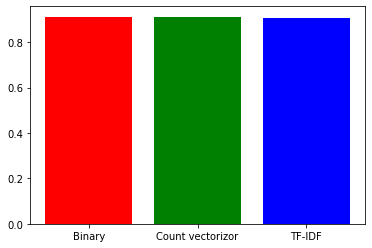

In [25]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
height = [binary_accurcy, count_vec_accurcy, tf_idf_accurcy]
bars = ('Binary', 'Count vectorizor', 'TF-IDF')
x_pos = np.arange(len(bars))


# Create bars
plt.bar(x_pos, height, color = ['red', 'green','blue'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [26]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# rf = RandomForestClassifier()
# rf.fit(x_train,y_train)
# y_pred = rf.predict(x_test)

# print(np.mean(y_pred==y_test))
# print(accuracy_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))